In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import csv
import sys
sys.path.append('/storage/home/hcoda1/4/ashelby8/Manitoba/pyNab/src/')
import nabPy as Nab
sys.path.append('/storage/home/hcoda1/4/ashelby8/calibration/calibration/')
from FitClass import SnCalibration
from config import conf
import FitFuncs
import pandas as pd
import pylab as py
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pd.set_option("display.max_colwidth", 15)

In [27]:
runs = [1374, 1389, 1391, 1392, 1393, 1395, 1399]
        #1383, 1385, 1389]
# runs = [1304]

In [28]:
data = []
for i in range(len(runs)):
    with open('/storage/home/hcoda1/4/ashelby8/output%d.csv'%runs[i]) as f:
        csv.DictReader(f)
        data.append(pd.read_csv(f))

In [29]:
dataAll = pd.concat(data,ignore_index = True)

In [7]:
len(runs)

6

In [8]:
dataAll[dataAll['run']==1391]

,run,pixel,Bias Voltage,Proton,Proton Energy,Cd109,Sn113,Date Time [UTC],trap rise,trap length,trap decay,ecap,chi2_e,xray,chi2_x,CE,Xray,CE hist,Xray hist
42,1391,76,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 9.1091990...,0.301492,[ 1.1382129...,218.376054,3,4,[ 0 0 0 ...,[751 608 40...
43,1391,77,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 1.0446748...,0.352830,[ 9.4352202...,16.254650,2,5,[ 1 0 1 ...,[614 542 39...
44,1391,78,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 6.2822317...,0.201486,[ 3.6140626...,8.338450,2,4,[ 1 0 0 ...,[167 122 9...
45,1391,87,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 8.7450611...,0.231103,[ 1.7483230...,531.567597,1,4,[ 0 0 0 ...,[755 737 61...
46,1391,88,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 8.8850680...,0.190900,[ 2.4342162...,25.325328,1,5,[ 0 0 0 ...,[1075 1034 ...
47,1391,96,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 6.0962149...,0.181231,[ 9.4204102...,7.050262,1,3,[0 1 0 1 0 ...,[67 51 28 3...
48,1391,97,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 3.3409119...,0.189105,[ 2.0187165...,75.648103,1,4,[1 0 1 0 2 ...,[844 677 49...
49,1391,98,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 4.8149066...,0.228877,[ 3.3594938...,44.557793,1,3,[ 0 1 1 ...,[176 141 14...
50,1391,101,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 4.3600996...,0.118422,[ 7.2400327...,6.248749,1,4,[0 1 0 0 0 ...,[265 217 16...
51,1391,103,-250,False,0,False,True,2022-02-03 ...,1250,50,1250,[ 8.9646630...,0.102192,[ 1.1821201...,3.196614,1,3,[0 0 0 0 0 ...,[85 41 22 1...


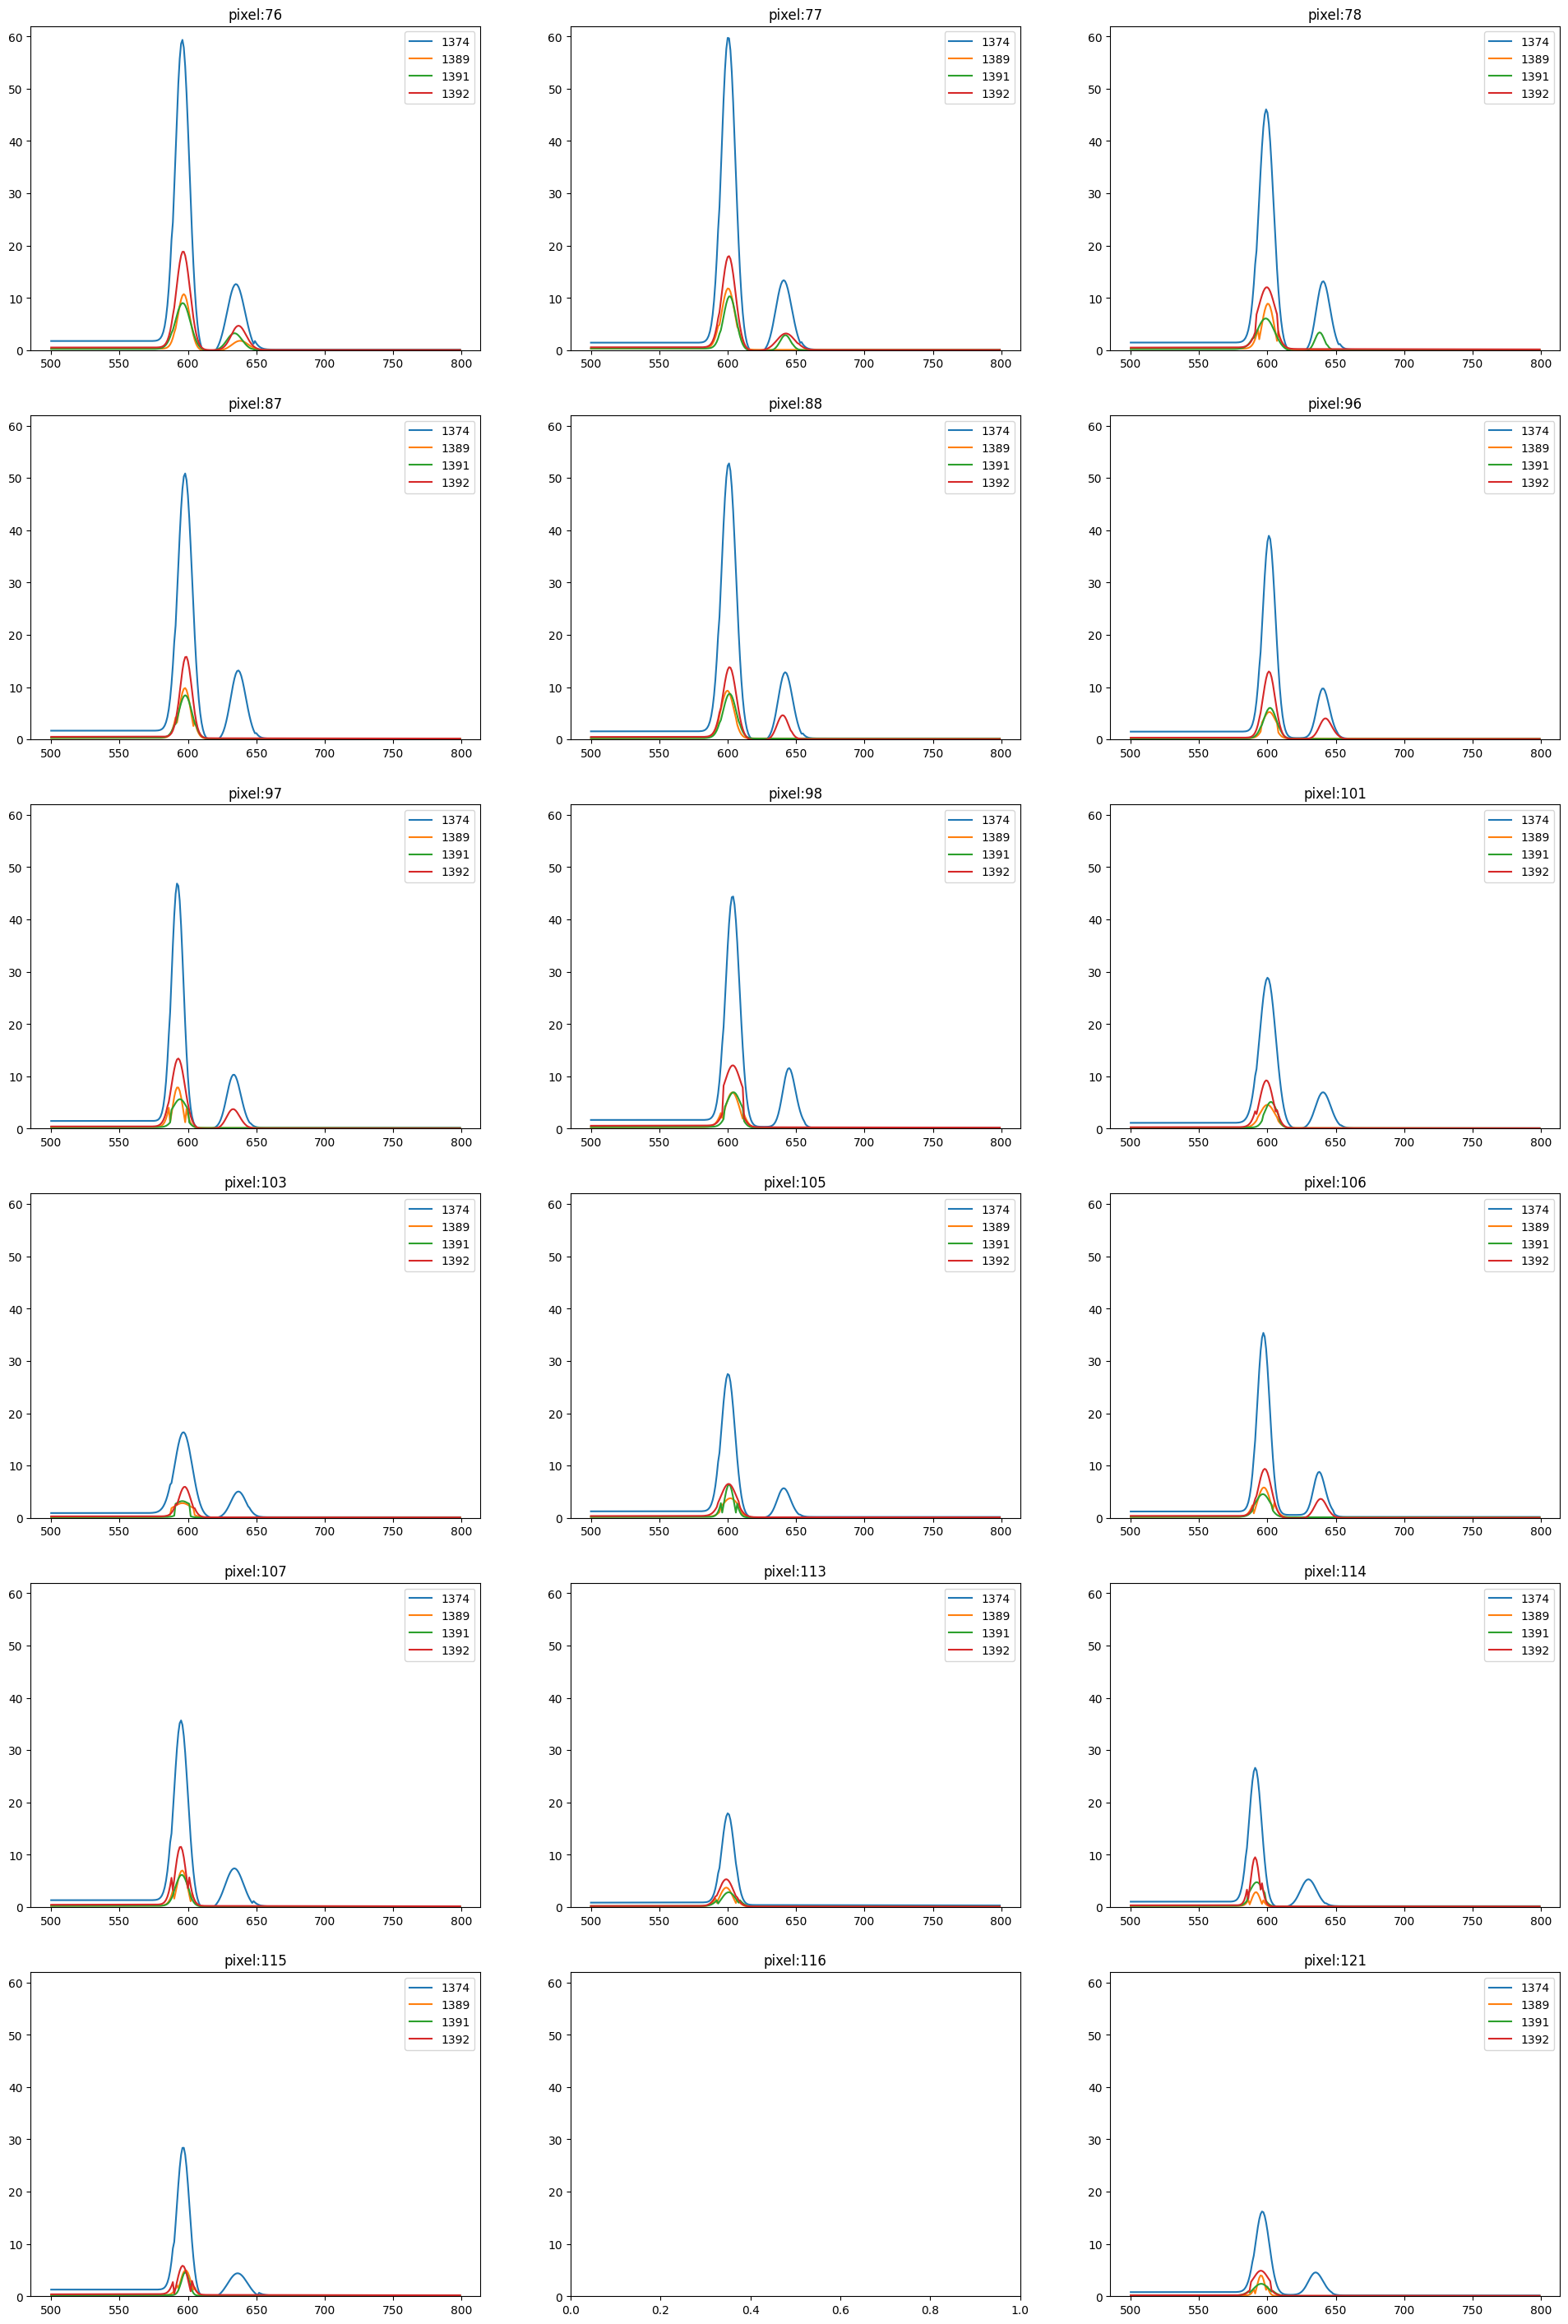

In [9]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))


x = np.arange(500,800)
conf['xray'] = 'OFF'
cnt = 0
for j in np.int16(dataAll[dataAll['run']==1374]['pixel'][:18]):
    cnt +=1
    ax=py.subplot(nrows,ncols,cnt)
    ax.set_title('pixel:%d'%j)
    ax.set_ylim(0,62)
    for i in range(4):
        
        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==3:
            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'three'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==2:

            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'two'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==1:

            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'one'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()


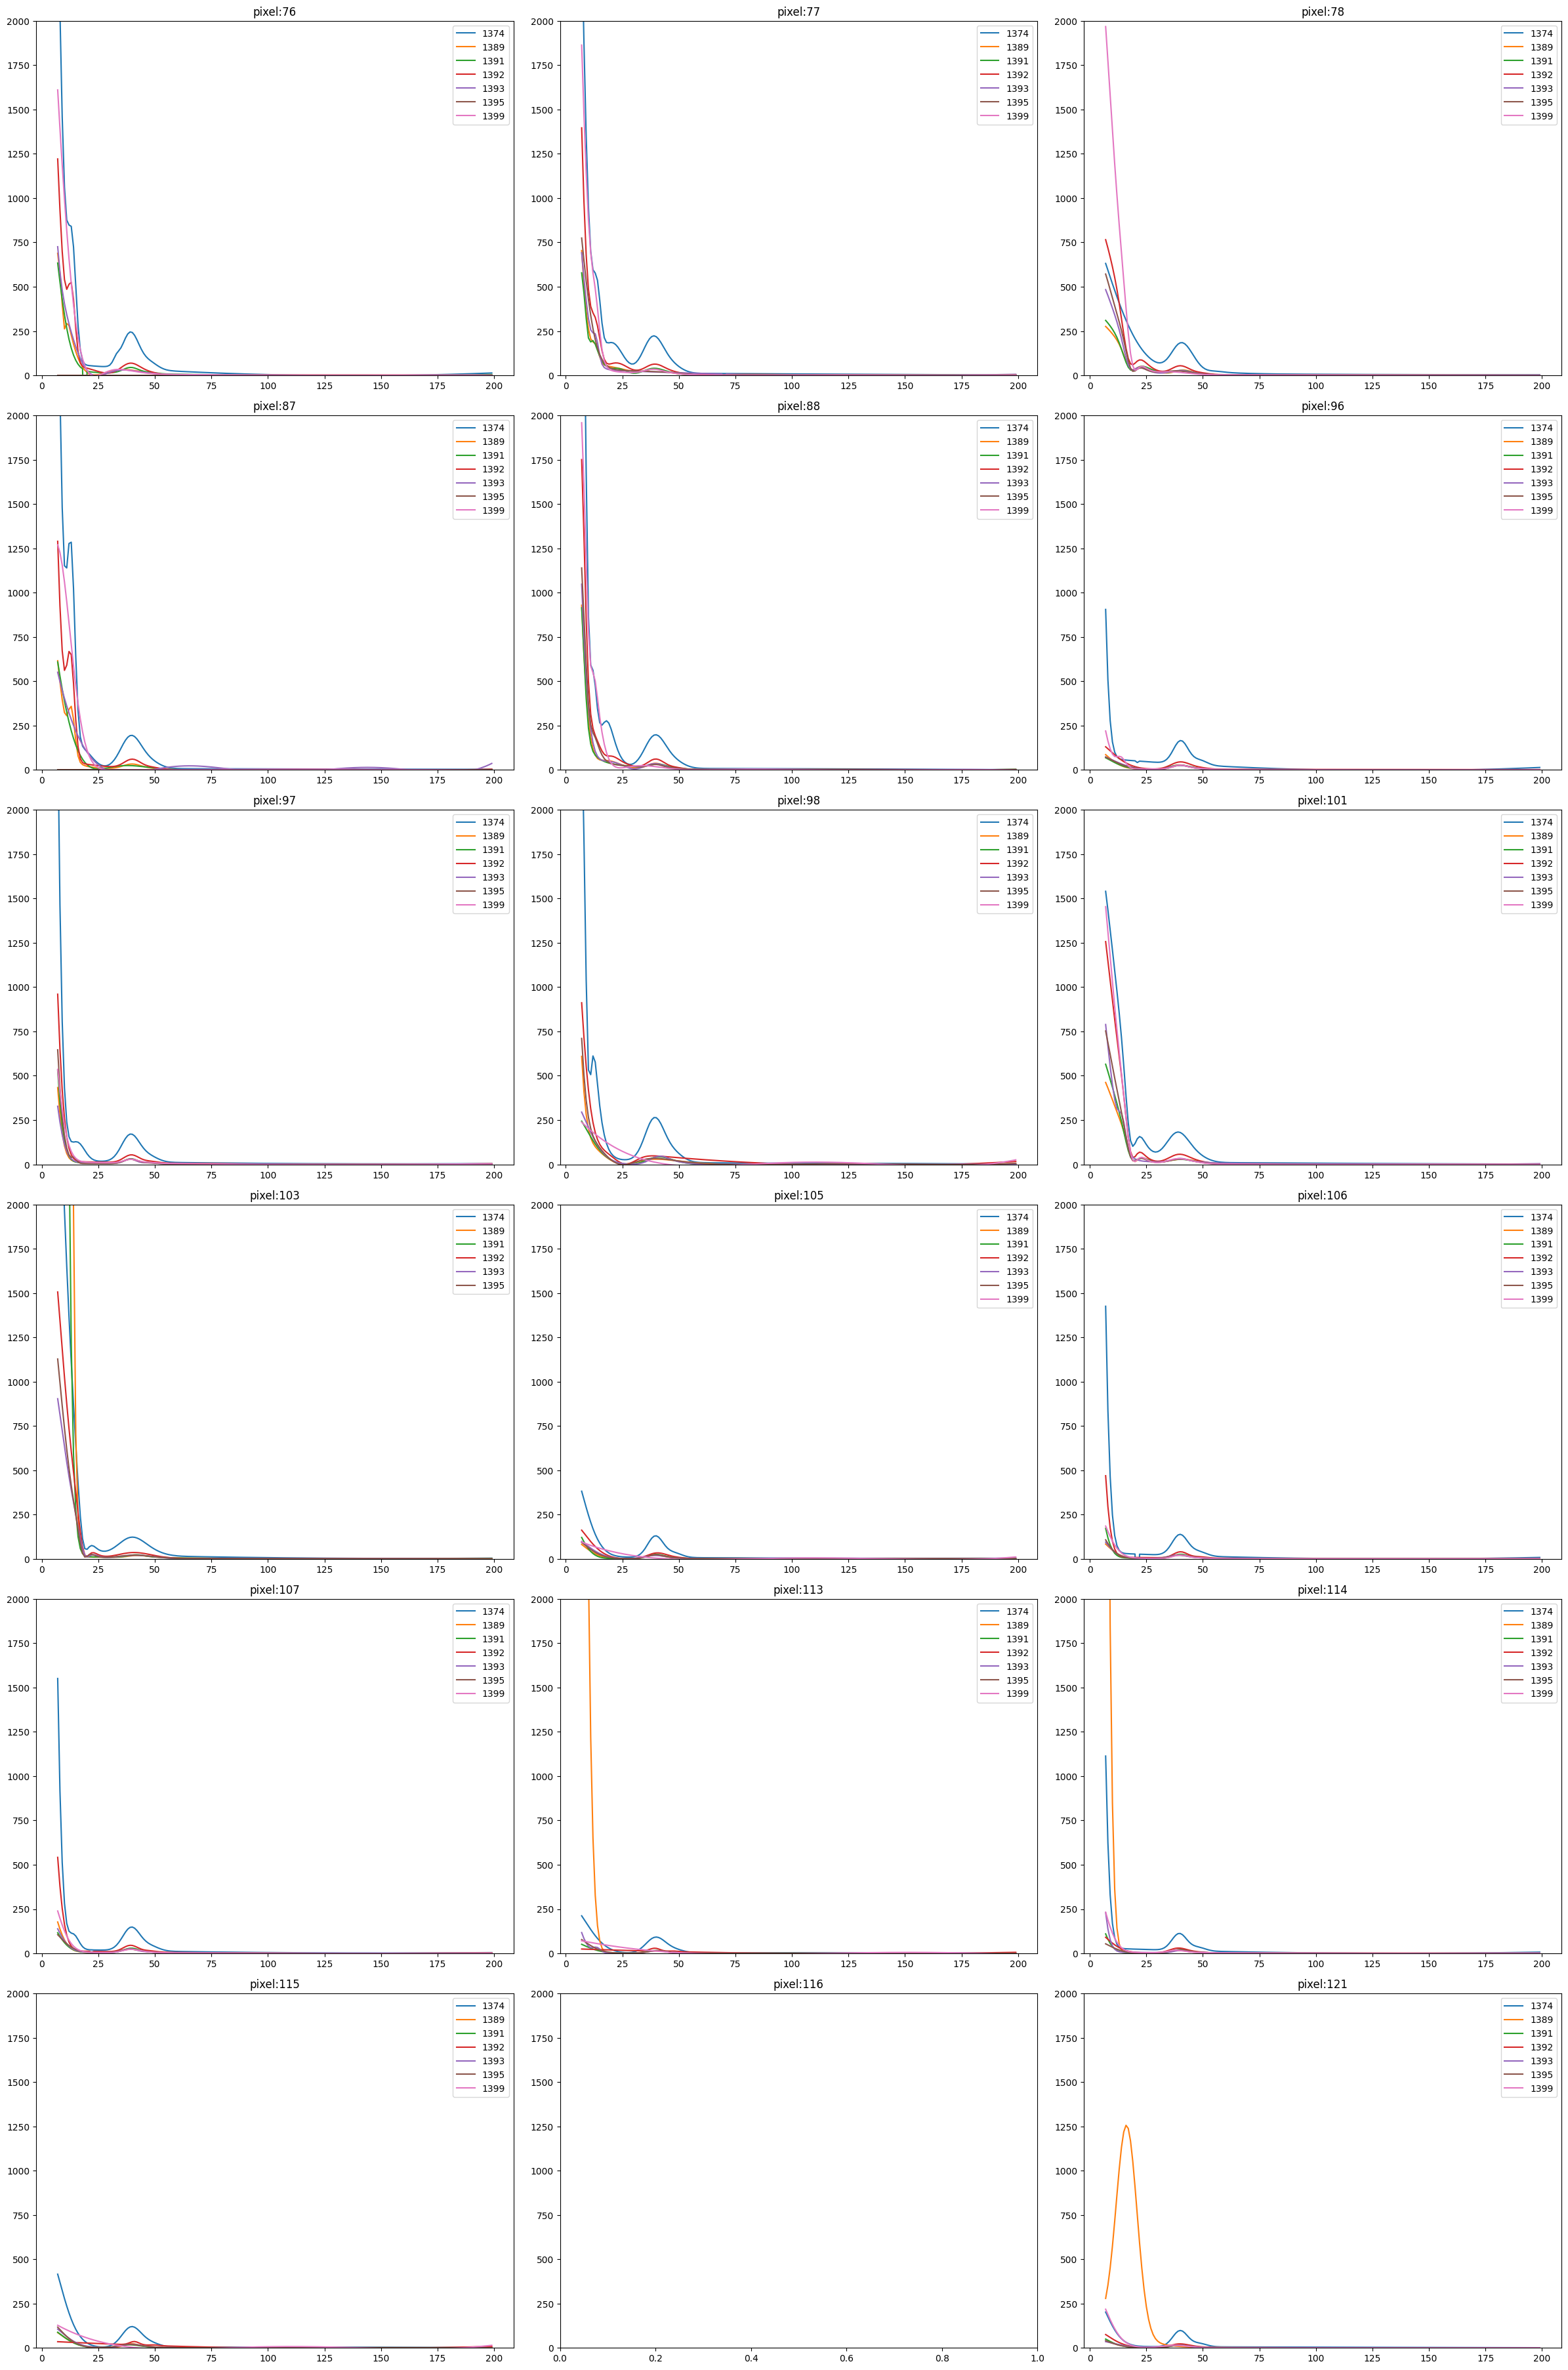

In [35]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))


x = np.arange(7,200)
conf['capture'] = 'OFF'
cnt = 0
for j in np.int16(dataAll[dataAll['run']==1374]['pixel'][:18]):
    cnt +=1
    ax=py.subplot(nrows,ncols,cnt)
    ax.set_title('pixel:%d'%j)
    ax.set_ylim(0,2000)
    for i in range(7):
        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==5:

            conf['xray'] = 'five'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==4:

            conf['xray'] = 'four'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==3:

            conf['xray'] = 'three'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)

            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()
            
#         if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==2:

#             conf['xray'] = 'two'
#             Sn = SnCalibration()

#             ax=py.subplot(nrows,ncols,cnt)

#             ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
#             ax.legend()


        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==2:

            conf['xray'] = 'zero'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)

            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend()

py.tight_layout()

189


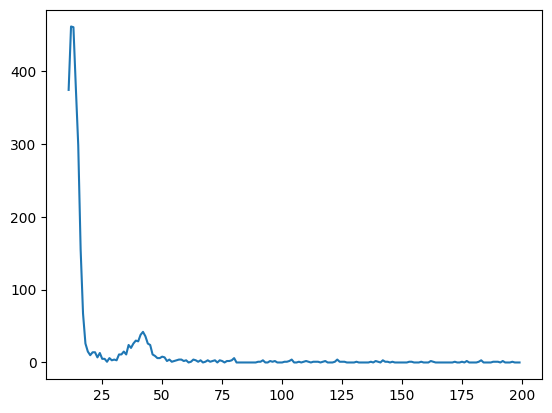

In [33]:
x = np.arange(11,200)
print(len(x))
# for i in range(7):
conf['capture'] = 'OFF'
conf['xray'] = 'four'
Sn = SnCalibration()
        
        #plot all the fits with the same initilization on the same graph
        
        
        #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
plt.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==87].iloc[4]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[1])


plt.plot(x,np.float64(dataAll[dataAll['pixel']==87].iloc[4]['Xray hist'].replace('[','').replace(']','').split()))
# plt.ylim(0,100)
# plt.xlim(7,100)
plt.show()

In [4]:
%%time

runNumber = 1395
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 1.3 s, sys: 3.62 s, total: 4.92 s
Wall time: 14.9 s


In [5]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

CPU times: user 6.17 s, sys: 886 ms, total: 7.06 s
Wall time: 2.81 s


In [23]:
conf['capture'] = 'OFF'
conf['xray'] = 'four'
Sn = SnCalibration()
thresh_peak, thresh_start = FitFuncs.get_peak(results,Sn.X1[0],Sn.X1[1])
bins = np.arange(thresh_start,200)
Xpeak, Xcenter = FitFuncs.get_peak(results,Sn.X2[0],Sn.X2[1])
peak1,center1 = FitFuncs.get_peak(results,thresh_start+5,thresh_start+7)
peak2, center2 = FitFuncs.get_peak(results,20,22)

pars = [thresh_peak+400, 0, thresh_start, peak1, center1, 4, Xpeak, Xcenter,5, 10, 1, 3, 5]
hist, prams, chi, err = Sn.fitter(results,bins,pars)

In [24]:
prams

array([ 7.52783882e+03,  0.00000000e+00,  2.04192284e+01, -6.02717691e+03,
        4.00544526e+00,  1.85583814e+01, -1.37371660e-02,  2.02217881e+02,
        1.56499804e-01,  1.90745924e+07, -1.90745864e+07, -6.88660510e-02,
        2.12981007e-04])

In [25]:
Xcenter

37.0

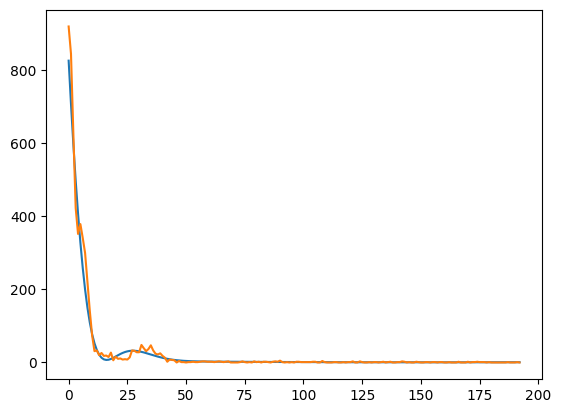

In [26]:
x = np.arange(7,200)
plt.plot(Sn.get_fit(x,*prams))
plt.plot(hist)
# plt.ylim(0,100)

In [114]:
#set up coumn naming scheme for the fit parameters
names = []
for i in range(10):
    names.append('p%d'%i)
names_xray = []
for i in range(16):
    names_xray.append('p%d'%i)

In [115]:
#create the parameter data frames
df_ecap = {}
for k in range(len(runs)-4):
    print(runs[k])
    df1 = {}
    for i in range(len(names)):
        df1[names[i]] = {}
        
        for j in range(20):
            j = j+k*21
            par_list = np.float64(dataAll[dataAll['run']==runs[k]]['ecap'][j].replace('[','').replace(']','').split()).tolist()

        #depending on the fit type used for each pixel, the numer of parameters obtained changes
        #need to add in empty slots for pixels with fewer to be able to construct the dataframe
            if len(par_list) != len(names):
                par_list.extend(['']*(len(names)-len(par_list)))

            df1[names[i]][j] = par_list[i]
    ecap_data = pd.DataFrame(df1)
    df_ecap[k] = df1
    
df_xray = {}
for k in range(len(runs)-4):
    df2 = {}
    for i in range(len(names_xray)):
        df2[names_xray[i]] = {}
        for j in range(20):
            j = j+k*21
            par_list = np.float64(dataAll[dataAll['run']==runs[k]]['xray'][j].replace('[','').replace(']','').split()).tolist()

            if len(par_list) != len(names_xray):
                par_list.extend(['']*(len(names_xray)-len(par_list)))

            df2[names_xray[i]][j] = par_list[i]
    xray_data = pd.DataFrame(df2)
    df_xray[k] = df2

1374
1389


In [116]:
pd.DataFrame(df_ecap[0])

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,60.331279,595.830457,7.343170,11.907053,634.383715,8.862814,-0.952456,2.740403,-0.000034,1.056828
1,60.516611,600.460307,7.348719,12.364225,640.286377,7.821571,-0.548648,2.046451,-0.000078,0.621154
2,46.452241,599.111324,7.618932,12.293611,640.119192,6.657136,-0.392126,1.843761,0.000049,0.561678
3,51.178510,597.815539,7.433323,12.03199,636.098134,7.39893,-0.294413,1.974836,-0.000003,0.454966
4,53.112286,600.738224,7.505273,11.79991,641.491906,6.957433,-0.2686,1.788869,0.000066,0.513116
5,38.691885,601.147997,6.656039,8.729228,640.025736,5.990173,0.272629,1.197081,0.000058,-0.07287
6,46.967130,592.318800,6.154507,9.290919,632.893693,6.845354,0.018975,1.424339,0.000055,0.20292
7,44.177367,603.580755,7.185279,10.295036,644.303194,6.074913,0.354054,1.352247,-0.000076,-0.272024
8,28.909535,600.135609,8.450523,6.249694,639.981935,7.411158,-0.040178,1.148418,0.000007,0.149911
9,16.431157,596.679150,9.179157,5.091188,636.912867,7.910862,-0.046515,0.933286,0.000072,0.22574


In [117]:
pd.DataFrame(df_xray[0])

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15
0,8074.259070,0.0,6.745521,592.998733,13.351061,2.510476,3.071991e+01,3.290576e+01,-1.861600,2.038544e+02,39.208554,5.179095,6358073.99,-6357997.52,-1.133651,0.004104
1,6797.980860,0.0,7.028712,327.543383,13.798395,2.300749,1.703983e+02,2.036191e+01,-6.692627,2.028601e+02,38.614297,6.268247,-6358489.8,6358504.33,-0.064864,-0.000003
2,2106.906570,0.0,29.650519,-1382.084820,8.679472,-25.986474,1.517172e+02,4.040374e+01,5.978797,2.133984e+01,46.04052,-4.462328,-19148400.4,19148416.4,-0.133231,0.000343
3,10319.346300,0.0,6.328602,1058.282570,12.871729,2.438675,1.105311e+02,1.740259e+01,6.352350,1.802712e+02,39.32824,6.34274,6358229.67,-6358220.07,-0.051618,0.000089
4,5916.192160,0.0,11.443557,-1272.801110,9.820762,2.091202,-1.034443e+03,1.289867e+01,4.161764,1.826210e+02,39.403079,6.407509,6341714.81,-6341705.78,-0.015933,-0.000118
5,3925.131310,0.0,5.504404,-26.595560,26.569767,6.135009,1.277201e+02,4.012049e+01,4.699499,6.340979e+06,-6340902.22,-1.177844,0.004332,,,
6,10310.543700,0.0,5.716153,-20.260810,29.249816,-2.758951,1.385851e+02,3.935800e+01,5.082786,6.343055e+06,-6342993.3,-0.902223,0.003251,,,
7,4756.838340,0.0,9.010700,-902.912358,9.801019,1.883261,3.201729e+02,-1.239673e+02,92.895243,2.419813e+02,39.22716,5.935233,-6341697.85,6341693.72,0.166692,-0.000712
8,1678.579670,0.0,14.785103,-261.813360,18.154179,2.686783,-6.972477e+00,-3.782992e+01,1.516121,1.618402e+02,38.715157,6.938435,-6482634.04,6482646.62,-0.057581,-0.00001
9,3603.079430,0.0,11.451055,-215.065443,18.292338,2.618952,9.799021e+01,3.954045e+01,8.389620,6.483783e+06,-6483756.65,-0.270726,0.00077,,,


In [118]:
def cal_data(dataAll,run,ecap_data,xray_data,index):
    calibration_data = []
    sig_data = []
    for i in range(20):
        points = []
        sig = []
        i = i+21*index
        if dataAll[dataAll['run']==run]['CE'][i]==3 or dataAll[dataAll['run']==run]['CE'][i]==2:
            points.append(ecap_data['p1'][i])
            points.append(ecap_data['p4'][i])

            sig.append(ecap_data['p2'][i])
            sig.append(ecap_data['p5'][i])

        if dataAll[dataAll['run']==run]['CE'][i]==1:
            points.append(ecap_data['p1'][i])
            sig.append(ecap_data['p2'][i])

        if dataAll[dataAll['run']==run]['Xray'][i]==5:
            points.append(xray_data['p10'][i])
            sig.append(xray_data['p11'][i])

        if dataAll[dataAll['run']==run]['Xray'][i]==4:
            points.append(xray_data['p7'][i])
            sig.append(xray_data['p8'][i])
            
        if dataAll[dataAll['run']==run]['Xray'][i]==3:
            points.append(xray_data['p4'][i])
            sig.append(xray_data['p5'][i])

        calibration_data.append(points)
        sig_data.append(sig)
        
    return calibration_data, sig_data

In [119]:
dataAll[dataAll['run']==1389]['CE']

21    3
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    0
38    1
39    1
40    0
41    1
Name: CE, dtype: int64

In [120]:
calibration = []
sigma = []
for i in range(len(runs)-4):
    calibration.append(cal_data(dataAll,runs[i],pd.DataFrame(df_ecap[i]),pd.DataFrame(df_xray[i]),i)[0])
    sigma.append(cal_data(dataAll,runs[i],pd.DataFrame(df_ecap[i]),pd.DataFrame(df_xray[i]),i)[1])

In [128]:
calibration[0]

[[np.float64(595.830457), 634.383715, 39.208554],
 [np.float64(600.460307), 640.286377, 38.6142967],
 [np.float64(599.111324), 640.119192, 46.0405198],
 [np.float64(597.815539), 636.098134, 39.3282403],
 [np.float64(600.738224), 641.491906, 39.4030789],
 [np.float64(601.147997), 640.025736, np.float64(40.1204915)],
 [np.float64(592.3188), 632.893693, np.float64(39.3580045)],
 [np.float64(603.580755), 644.303194, 39.2271599],
 [np.float64(600.135609), 639.981935, 38.7151569],
 [np.float64(596.67915), 636.912867, np.float64(39.5404452)],
 [np.float64(600.310562), 640.416839, np.float64(39.6352683)],
 [np.float64(597.06724), 637.321273, np.float64(39.6696069)],
 [np.float64(594.881826), 633.22958, np.float64(39.6934648)],
 [np.float64(600.204394), np.float64(39.6745923)],
 [np.float64(591.082773), 629.289442, np.float64(0.0)],
 [np.float64(596.508756), 635.565879, np.float64(39.6000215)],
 [],
 [np.float64(596.275692), 634.601163, np.float64(39.9678118)],
 [np.float64(593.009801), 633.349

In [129]:
ADC_data = []
for j in range(len(calibration)):
    ADC_data.append([np.sort(calibration[j][i]) for i in range(len(calibration[j]))])

In [130]:
ADC_data

[[array([ 39.208554, 595.830457, 634.383715]),
  array([ 38.6142967, 600.460307 , 640.286377 ]),
  array([ 46.0405198, 599.111324 , 640.119192 ]),
  array([ 39.3282403, 597.815539 , 636.098134 ]),
  array([ 39.4030789, 600.738224 , 641.491906 ]),
  array([ 40.1204915, 601.147997 , 640.025736 ]),
  array([ 39.3580045, 592.3188   , 632.893693 ]),
  array([ 39.2271599, 603.580755 , 644.303194 ]),
  array([ 38.7151569, 600.135609 , 639.981935 ]),
  array([ 39.5404452, 596.67915  , 636.912867 ]),
  array([ 39.6352683, 600.310562 , 640.416839 ]),
  array([ 39.6696069, 597.06724  , 637.321273 ]),
  array([ 39.6934648, 594.881826 , 633.22958  ]),
  array([ 39.6745923, 600.204394 ]),
  array([  0.      , 591.082773, 629.289442]),
  array([ 39.6000215, 596.508756 , 635.565879 ]),
  array([], dtype=float64),
  array([ 39.9678118, 596.275692 , 634.601163 ]),
  array([ 39.6194423, 593.009801 , 633.349595 ]),
  array([ 39.5882563, 597.397245 , 636.797207 ])],
 [array([  5.77967236, 596.983415  , 637

In [131]:
def calibration_quad(x,a,b,c):
    return a*x**2 + b*x + c

def calibration_lin(x,a,b):
    return a*x + b

In [132]:
eV_points = [22.59,363.758,387.461]

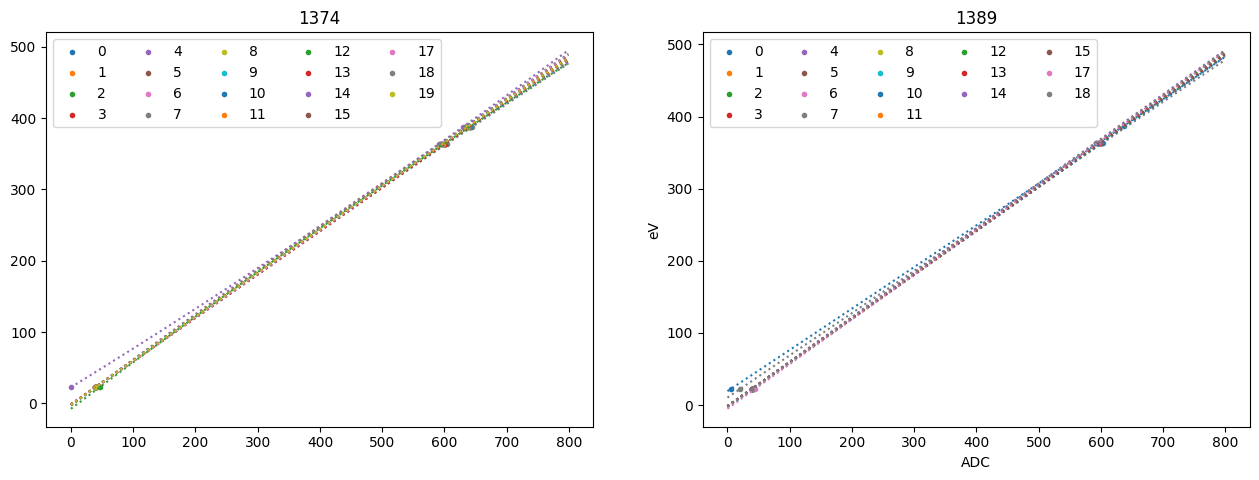

In [138]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))

toeV = []
for j in range(len(ADC_data)):
    fit_pars_toeV = []
    x = np.arange(0,800)
    
    for i in range(len(ADC_data[j])):
        ax=py.subplot(nrows,ncols,j+1)
        #if there are no points, skip the pixel
        if len(ADC_data[j][i])<=1:
            pass

        #only include the eV points associated with the corresponding ADC value
        elif len(ADC_data[j][i])<3:
            a, b = np.polyfit(ADC_data[j][i],eV_points[:2], deg=1)
            ax.scatter(ADC_data[j][i],eV_points[:2],marker = '.',label = '%d'%i)
            fit_pars_toeV.append([a,b])
            ax.plot(x,calibration_lin(x,a,b),linestyle = ':')
        else:
            a, b,c = np.polyfit(ADC_data[j][i], eV_points, deg=2)
            ax.scatter(ADC_data[j][i],eV_points,marker = '.',label = '%d'%i)
            fit_pars_toeV.append([a,b,c])
            ax.plot(x,calibration_quad(x,a,b,c),linestyle = ':')
    toeV.append(fit_pars_toeV)
    ax.legend(loc="upper left", ncol=5)
    ax.set_title('%d'%runs[j])
    

plt.xlabel('ADC')
plt.ylabel('eV')
plt.show()

In [151]:
def convert(x,pars):
    y = []
    for i in pars:
        if len(i)==3:
            quad = i[0]
            lin = i[1]
            intercept = i[2]
            y.append(quad*x**2 + lin*x + intercept)
            

        if len(i)==2:
            lin = i[0]
            intercept = i[1]
            y.append(lin*x + intercept)
            
    return y

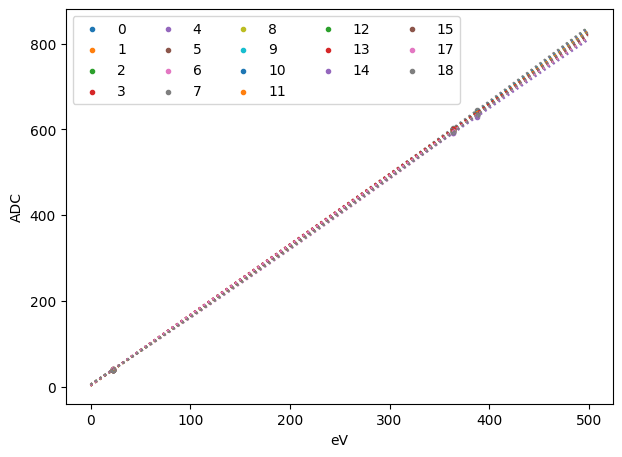

In [25]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))

ax=py.subplot(nrows,ncols,1)
toeV = []
for j in range(len(ADC_data)):
    fit_pars_toADC = []
    x = np.arange(0,500)
    for i in range(len(ADC_data)):

        #if there are no points, skip the pixel
        if len(ADC_data[i])<=1:
            pass

        #only include the eV points associated with the corresponding ADC value
        elif len(ADC_data[i])<3:
            a, b = np.polyfit(eV_points[:2],ADC_data[i], deg=1)
            ax.scatter(eV_points[:2],ADC_data[i],marker = '.',label = '%d'%i)
            fit_pars_toADC.append([a,b])
            ax.plot(x,calibration_lin(x,a,b),linestyle = ':')
        else:
            a, b,c = np.polyfit(eV_points, ADC_data[i], deg=2)
            ax.scatter(eV_points,ADC_data[i],marker = '.',label = '%d'%i)
            fit_pars_toADC.append([a,b,c])
            ax.plot(x,calibration_quad(x,a,b,c),linestyle = ':')
    

plt.legend(loc="upper left", ncol=5)
plt.xlabel('eV')
plt.ylabel('ADC')
plt.show()

In [46]:
convert(370,fit_pars_toADC)

[np.float64(605.9849158038371),
 np.float64(610.9385422731157),
 np.float64(609.8831937372842),
 np.float64(607.903407760068),
 np.float64(611.4485874345871),
 np.float64(611.387524017868),
 np.float64(602.9766247659343),
 np.float64(614.2856097008703),
 np.float64(610.6182285847449),
 np.float64(607.2551537637726),
 np.float64(610.8575549492792),
 np.float64(607.6484163182787),
 np.float64(604.983398033405),
 np.float64(610.4579891300249),
 np.float64(601.1455819538295),
 np.float64(606.7894406495158),
 np.float64(606.3725161918989),
 np.float64(603.6089884455691)]

In [47]:
convert(356,fit_pars_toADC)

[np.float64(583.2080227349743),
 np.float64(587.4468292949789),
 np.float64(585.7504181524847),
 np.float64(585.2711969389492),
 np.float64(587.4483498642312),
 np.float64(588.4202139255203),
 np.float64(579.099661626211),
 np.float64(590.2950181109294),
 np.float64(587.117628801397),
 np.float64(583.5537074799688),
 np.float64(587.2166425054132),
 np.float64(583.9355455499498),
 np.float64(582.3238963453159),
 np.float64(587.4604992517244),
 np.float64(578.574624689335),
 np.float64(583.7358798685565),
 np.float64(583.7225469877912),
 np.float64(579.8602784802531)]

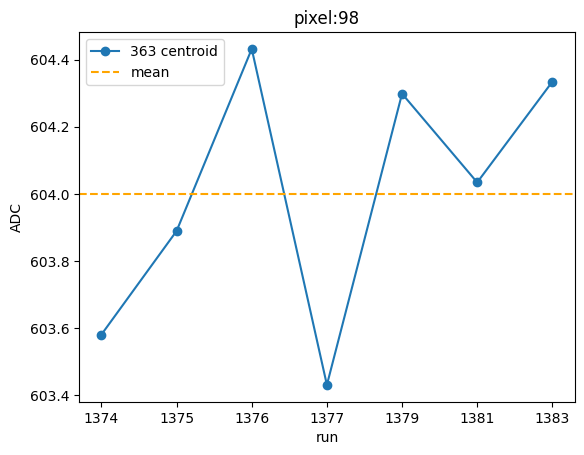

In [212]:
plt.plot(ecap_data['p1'],marker = 'o',label = '363 centroid')
plt.axhline(np.mean(ecap_data['p1']),linestyle = '--',color = 'orange',label = 'mean')
plt.title('pixel:98')

plt.xticks(np.arange(0,7),runs[0:7])
plt.xlabel('run')
plt.ylabel('ADC')
plt.legend()
plt.show()

In [171]:
np.mean(ecap_data['p1'])

np.float64(600.357253)